# 3. Data Analysis

## 3.1 Introduction

## 3.2 Data Overview

### 3.2.1 Importing Libraries

In [13]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import os
import sys

# Load the environment variables
load_dotenv("../config/.env")

# Get the path to the scripts folder
scripts_path = os.getenv("SCRIPTS_PATH")

# Add the path to the scripts folder to the sys.path list
if scripts_path is not None:
    if scripts_path not in sys.path:
        sys.path.append(scripts_path)

# Import functions from libraries
from temp_conversion import kmh_to_mph

# Set the style of the plots
plt.style.use('ggplot')

# Display all the columns
pd.set_option('display.max_columns', None)

# Stop scientific notation and limit to 2 decimal points
pd.set_option('display.float_format', '{:.2f}'.format)

### 3.2.2 Loading Data

In [2]:
# Load the `migraine_weather` DataFrame from 02_data_preprocessing.ipynb
migraine_weather = pd.read_csv("../data/processed/migraine_weather.csv")

# Check the shape of the DataFrame
print(migraine_weather.shape)

# Check the first 5 rows of the DataFrame
migraine_weather.head()

(23489, 23)


,sex,age,cause,year,min_temp_f,max_temp_f,avg_temp_f,total_cases,total_cases_upper_ci,total_cases_lower_ci,country,state,precipitation_in,snow_depth_in,avg_sea_level_pres_mmhg,avg_wind_dir_deg,avg_wind_speed_kmh,latitude,longitude,population,area,region,continent
0,Male,85+ years,Migraine,2015,68.66,77.50,73.01,6721,8764,5091,Taiwan,Non-US,17.88,1578.54,761.44,286.66,12.75,25.04,121.56,23424615,36193.00,Eastern Asia,Asia
1,Female,45-49 years,Tension-type headache,2015,68.66,77.50,73.01,189293,293944,120618,Taiwan,Non-US,17.88,1578.54,761.44,286.66,12.75,25.04,121.56,23424615,36193.00,Eastern Asia,Asia
2,Female,50-54 years,Tension-type headache,2015,68.66,77.50,73.01,194310,282166,122451,Taiwan,Non-US,17.88,1578.54,761.44,286.66,12.75,25.04,121.56,23424615,36193.00,Eastern Asia,Asia
3,Female,55-59 years,Tension-type headache,2015,68.66,77.50,73.01,157713,229677,101843,Taiwan,Non-US,17.88,1578.54,761.44,286.66,12.75,25.04,121.56,23424615,36193.00,Eastern Asia,Asia
4,Female,15-19 years,Tension-type headache,2015,68.66,77.50,73.01,160246,247914,97203,Taiwan,Non-US,17.88,1578.54,761.44,286.66,12.75,25.04,121.56,23424615,36193.00,Eastern Asia,Asia


In [14]:
# convert the `avg_wind_speed_kmh` column to mph
migraine_weather['avg_wind_speed_mph'] = migraine_weather['avg_wind_speed_kmh'].apply(kmh_to_mph)

In [19]:
# Reorder temperature columns
temp_col6 = migraine_weather.pop('avg_wind_speed_mph')

# Insert columns at new position
migraine_weather.insert(15, 'avg_wind_speed_mph', temp_col6)

In [21]:
migraine_weather.drop(columns='avg_wind_speed_kmh', inplace=True)
migraine_weather.head(1)

,sex,age,cause,year,min_temp_f,max_temp_f,avg_temp_f,total_cases,total_cases_upper_ci,total_cases_lower_ci,country,state,precipitation_in,snow_depth_in,avg_sea_level_pres_mmhg,avg_wind_speed_mph,avg_wind_dir_deg,latitude,longitude,population,area,region,continent
0,Male,85+ years,Migraine,2015,68,77,73,6721,8764,5091,Taiwan,Non-US,17,1578,761,7.46,286,25.04,121.56,23424615,36193.00,Eastern Asia,Asia


### 3.2.3 Data Description

#### 3.2.3.1 Data Types

In [22]:
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   sex                      23489 non-null  category
 1   age                      23489 non-null  category
 2   cause                    23489 non-null  category
 3   year                     23489 non-null  int64   
 4   min_temp_f               23489 non-null  int64   
 5   max_temp_f               23489 non-null  int64   
 6   avg_temp_f               23489 non-null  int64   
 7   total_cases              23489 non-null  int64   
 8   total_cases_upper_ci     23489 non-null  int64   
 9   total_cases_lower_ci     23489 non-null  int64   
 10  country                  23489 non-null  category
 11  state                    23489 non-null  category
 12  precipitation_in         23489 non-null  int64   
 13  snow_depth_in            23489 non-null  int64   
 14  avg_se

#### 3.2.3.2 Summary Statistics

In [23]:
migraine_weather.describe()

,year,min_temp_f,max_temp_f,avg_temp_f,total_cases,total_cases_upper_ci,total_cases_lower_ci,precipitation_in,snow_depth_in,avg_sea_level_pres_mmhg,avg_wind_speed_mph,avg_wind_dir_deg,latitude,longitude,population,area
count,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00
mean,2006.62,52.70,69.62,60.79,209451.20,275324.09,154462.27,45.62,1434.10,760.75,7.79,234.03,33.02,-22.49,127001647.11,3461260.34
std,9.09,14.08,13.74,13.51,670217.82,863663.58,507660.24,76.57,3714.90,2.42,2.57,40.58,20.67,75.81,190690768.98,4412190.86
min,1990.00,14.00,18.00,16.00,0.00,0.00,0.00,0.00,0.00,748.00,0.00,26.00,-34.86,-171.77,11323.00,2.02
25%,1999.00,43.00,59.00,51.00,6672.00,8675.00,4870.00,8.00,5.00,759.00,6.21,209.00,21.31,-84.40,5469700.00,41850.00
50%,2007.00,50.00,69.00,59.00,44803.00,59364.00,32776.00,25.00,119.00,761.00,7.46,239.00,39.05,-8.54,30492800.00,450295.00
75%,2015.00,63.00,82.00,72.00,154337.00,203204.00,111740.00,52.00,788.00,762.00,9.32,267.00,44.65,15.05,319259000.00,9629091.00
max,2019.00,85.00,110.00,95.00,16870296.00,21695928.00,12654858.00,891.00,56401.00,771.00,18.64,356.00,69.64,179.22,1367110000.00,9984670.00


## 3.3 Data Cleaning and Preprocessing

### 3.3.1 Missing Values

In [24]:
migraine_weather.isnull().sum()

sex                        0
age                        0
cause                      0
year                       0
min_temp_f                 0
max_temp_f                 0
avg_temp_f                 0
total_cases                0
total_cases_upper_ci       0
total_cases_lower_ci       0
country                    0
state                      0
precipitation_in           0
snow_depth_in              0
avg_sea_level_pres_mmhg    0
avg_wind_speed_mph         0
avg_wind_dir_deg           0
latitude                   0
longitude                  0
population                 0
area                       0
region                     0
continent                  0
dtype: int64

### 3.3.2 Data Type Conversion

Converting the data types of the following columns from `object` to `category`: `sex`, `age`, `cause`, `country`, `state`, `region`, and `continent`.

This change is beneficial for several reasons:
    - **Memory Efficiency**: Category data types use significantly less memory, especially when the number of unique categories is small compared to the dataset size.
    - **Performance**: Operations on category data types, such as grouping and sorting, are typically faster than their `object` string counterparts.
    - **Semantics**: Converting to `category` reflects the nature of the data more accurately, as these columns represent categorical variables.

In [25]:
# Define the columns to convert to categorical data types
cols_to_convert = ['sex', 'age', 'cause', 'country', 'state', 'region', 'continent']

# Convert the columns to categorical data types
migraine_weather[cols_to_convert] = migraine_weather[cols_to_convert].astype('category')

# Check the data types of the DataFrame
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   sex                      23489 non-null  category
 1   age                      23489 non-null  category
 2   cause                    23489 non-null  category
 3   year                     23489 non-null  int64   
 4   min_temp_f               23489 non-null  int64   
 5   max_temp_f               23489 non-null  int64   
 6   avg_temp_f               23489 non-null  int64   
 7   total_cases              23489 non-null  int64   
 8   total_cases_upper_ci     23489 non-null  int64   
 9   total_cases_lower_ci     23489 non-null  int64   
 10  country                  23489 non-null  category
 11  state                    23489 non-null  category
 12  precipitation_in         23489 non-null  int64   
 13  snow_depth_in            23489 non-null  int64   
 14  avg_se

Converting the data types of the following columns from 'float64' to 'int64': `min_temp_f`, `max_temp_f`, `avg_temp_f`, `precipitation_in`, `snow_depth_in`, `avg_sea_level_pres_mmhg`, `avg_wind_speed_mph`, and `avg_wind_dir_deg`.

The rationale behind this includes:

- **Data Accuracy**: These columns represent counts or whole numbers and should be stored as integers to reflect the discrete nature of the data.
- **Data Integrity**: Converting to `int64` ensures that these variables are treated as discrete data points, which can prevent potential issues with floating-point precision that are not relevant for integer-based data.
- **Memory Usage**: Depending on the data, integers can sometimes use less memory than floats, although this is less of a concern with 64-bit types.

In [26]:
# List of columns to convert to integer data types
cols_to_convert = ['min_temp_f', 'max_temp_f', 'avg_temp_f', 'precipitation_in', 'snow_depth_in', 'avg_sea_level_pres_mmhg', 'avg_wind_speed_mph', 'avg_wind_dir_deg']

# Convert the columns to integer data types
migraine_weather[cols_to_convert] = migraine_weather[cols_to_convert].astype('int64')

# Check the data types of the DataFrame
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   sex                      23489 non-null  category
 1   age                      23489 non-null  category
 2   cause                    23489 non-null  category
 3   year                     23489 non-null  int64   
 4   min_temp_f               23489 non-null  int64   
 5   max_temp_f               23489 non-null  int64   
 6   avg_temp_f               23489 non-null  int64   
 7   total_cases              23489 non-null  int64   
 8   total_cases_upper_ci     23489 non-null  int64   
 9   total_cases_lower_ci     23489 non-null  int64   
 10  country                  23489 non-null  category
 11  state                    23489 non-null  category
 12  precipitation_in         23489 non-null  int64   
 13  snow_depth_in            23489 non-null  int64   
 14  avg_se

## 3.4 Exploratory Data Analysis

- Visualize the distribution of migraines and sea-level pressure.
- Explore the relationship between migraines and different regions (if geographic data is available).
- Look for trends over time (seasonality, year-on-year changes, etc.).
- Investigate the relationship between migraines and other weather variables, if available.

### 3.4.1 Univariate Analysis

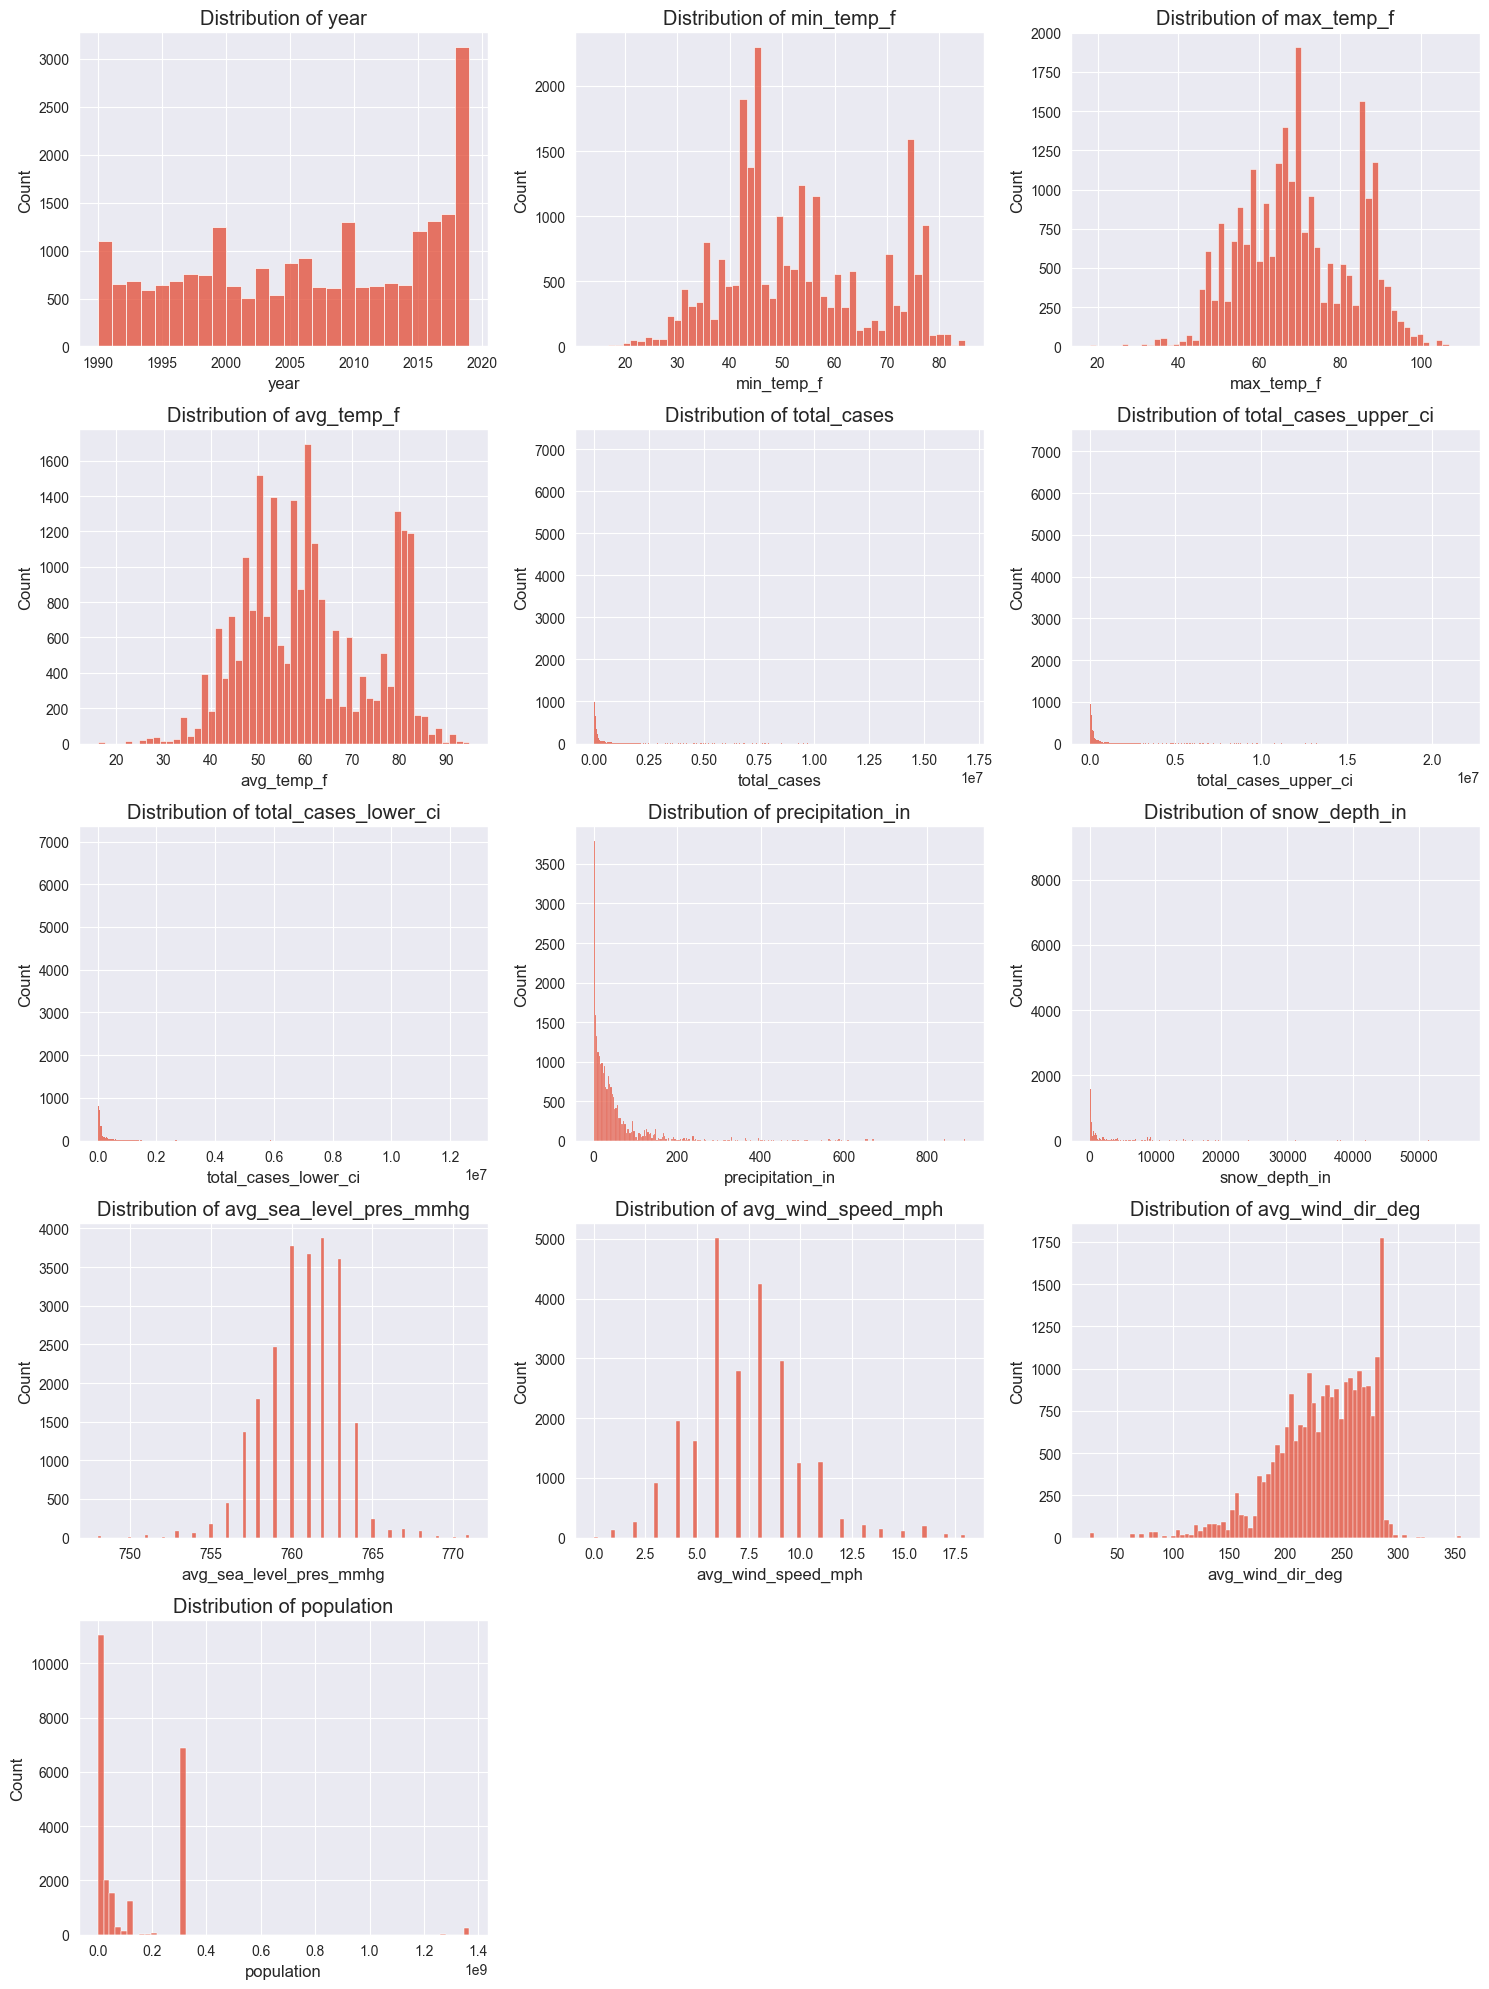

In [29]:
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create a grid of histograms for numeric columns
numeric_columns = migraine_weather.select_dtypes(include='int64').columns
num_plots = len(numeric_columns)
cols_per_row = 3  # You can change this to however many columns you want per row

# Calculate the number of rows needed
num_rows = (num_plots + cols_per_row - 1) // cols_per_row

# Create a figure with specified dimensions
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numeric columns and create a histogram on each subplot
for i, col in enumerate(numeric_columns):
    sns.histplot(migraine_weather[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any empty subplots that aren't used
for j in range(i + 1, num_rows * cols_per_row):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()

## 3.5 Statistical Analysis

- Conduct correlation analysis between sea-level pressure and migraine occurrences.
- Perform hypothesis testing to determine if the observed correlation is statistically significant.
- Explore regression analysis if appropriate, considering other variables that may affect migraines.

### 3.5.1 Correlation Analysis: Sea Level Pressure vs. Migraine Occurrences

## 3.6 Advanced Analysis

- Consider time-series analysis to understand trends and patterns over time.
- If demographic data is available, analyze how demographic factors may interact with sea-level pressure to affect migraine occurrences.

## 3.7 Insights and Conclusion

- Summarize the key findings from your EDA and statistical tests.
- Discuss the implications of your findings in the context of the initial question.
- Suggest areas for further research or additional data that could provide more insights.

## 3.8 Appendix/References

Include any additional material or references used in your analysis.